# {Project Title}📝

![Banner](./assets/banner.jpeg)

## Topic
*What problem are you (or your stakeholder) trying to address?*
📝 <!-- Answer Below -->

How does air quality affect human health? 

This is for general awareness about the dangers of pollution. Also, if patterns between specific air quality metrics and health impacts can be found, then a combination of public policy and medical interventions could address those health impacts.

## Project Question
*What specific question are you seeking to answer with this project?*
*This is not the same as the questions you ask to limit the scope of the project.*
📝 <!-- Answer Below -->

How do metrics of air quality correlate with metrics of human health? For example, AQI (air quality index) and life expectancy. 

Does coal usage (for energy generation) correlate with air quality, and by extension, does coal usage correlate with human health impacts?

## What would an answer look like?
*What is your hypothesized answer to your question?*
📝 <!-- Answer Below -->

The answer will look like scatter plots, correlation coefficients and regression models between air quality metrics and human health metrics.


In [56]:
import requests
from bs4 import BeautifulSoup
from io import StringIO

import pandas as pd
import numpy as np
import matplotlib as mpl

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

## Data Sources
*What 3 data sources have you identified for this project?*
*How are you going to relate these datasets?*
📝 <!-- Answer Below -->

Data:

https://www.kaggle.com/datasets/sazidthe1/global-air-pollution-data

https://gco.iarc.fr/today/en/dataviz/maps-prevalence?mode=population&age_end=17&age_start=0&options_indicator=%5Bobject%20Object%5D_%5Bobject%20Object%5D&types=2&cancers=40

https://vizhub.healthdata.org/gbd-results/

https://en.wikipedia.org/wiki/List_of_countries_by_life_expectancy

https://ourworldindata.org/grapher/coal-consumption-by-country-terawatt-hours-twh
Data sources: Energy Institute - Statistical Review of World Energy (2025) – with major processing by Our World in Data

https://en.wikipedia.org/wiki/List_of_countries_and_dependencies_by_population

Relating the data sets:
Plot each data set against air pollution to look for patterns and correlations (linear or polynomial regression)


## Approach and Analysis
*What is your approach to answering your project question?*
*How will you use the identified data to answer your project question?*
📝 <!-- Start Discussing the project here; you can add as many code cells as you need -->

## Import the data, transform the data and output it to CSV to combine the data in a spreadsheet

In [8]:
air_pollution_df = pd.read_csv("assets/data/AirPollution/global_air_pollution_data.csv")

In [9]:
air_pollution_df = air_pollution_df[['country_name', 'city_name', 'aqi_value', 'ozone_aqi_value', 'pm2.5_aqi_value']]

In [10]:
air_poll_mean_df = pd.DataFrame(data=air_pollution_df.groupby('country_name', as_index=False)['aqi_value'].mean())
air_poll_mean_df.columns = [['region', 'aqi_value']]

In [ ]:
air_poll_mean_df.to_csv("assets/data/AirPollution/air_poll_mean.csv")

In [5]:
# Fetch the data.
coal_df = pd.read_csv("https://ourworldindata.org/grapher/coal-consumption-by-country-terawatt-hours-twh.csv?v=1&csvType=full&useColumnShortNames=true", 
                 storage_options = {'User-Agent': 'Our World In Data data fetch/1.0'})
# Fetch the metadata
#metadata = requests.get("https://ourworldindata.org/grapher/coal-consumption-by-country-terawatt-hours-twh.metadata.json?v=1&csvType=full&useColumnShortNames=true").json()

In [6]:
coal_mean_df = pd.DataFrame(data=coal_df.groupby('Entity', as_index=False)['coal_consumption_twh'].mean())
coal_mean_df.columns = [['region', 'coal_consumption_twh']]
coal_mean_df.to_csv("assets/data/AirPollution/coal_mean_per_year.csv")

In [7]:
cancer_df = pd.read_csv("assets/data/AirPollution/cancers-excl-non-melanoma-skin-cancer.csv")
lung_cancer_df = pd.read_csv("assets/data/AirPollution/trachea-bronchus-and-lung.csv")

In [8]:
cancer_df = cancer_df[['Population', 'Alpha‑3 code', 'Cancer id', 'Prevalence (Prop. (W)) per 100 000']]
cancer_df.columns = [['region', 'Alpha‑3 code', 'Cancer id', 'Prevalence (Prop. (W)) per 100 000']]
cancer_df.to_csv("assets/data/AirPollution/cancer.csv")

In [9]:
lung_cancer_df = lung_cancer_df[['Population', 'Alpha‑3 code', 'Cancer id', 'Prevalence (Prop. (W)) per 100 000']]
lung_cancer_df.columns = [['region', 'Alpha‑3 code', 'Cancer id', 'Prevalence (Prop. (W)) per 100 000']]
lung_cancer_df.to_csv("assets/data/AirPollution/lung_cancer.csv")

In [11]:
chronic_lung_df = pd.read_csv("assets/data/AirPollution/IHME-GBD_2023_DATA-cd7bf834-1.csv")

In [12]:
chronic_lung_death_rate_df = chronic_lung_df[chronic_lung_df['metric_name']=='Rate']
chronic_lung_death_rate_df = chronic_lung_death_rate_df[['location_name', 'measure_name', 'cause_name', 'metric_name', 'year', 'val']]

In [13]:
chronic_lung_death_rate_df.columns = [['region', 'measure_name', 'cause_name', 'metric_name', 'year', 'val']]

In [16]:
chronic_lung_deaths = chronic_lung_death_rate_df[chronic_lung_death_rate_df['measure_name']=='Deaths']

In [13]:
chronic_lung_death_rate_df.to_csv("assets/data/AirPollution/chronic_lung_death_rate.csv")

In [21]:
life_expect_url = 'https://en.wikipedia.org/wiki/List_of_countries_by_life_expectancy'
headers = {'User-Agent': 'PyRequests/2.14'}
life_expect_page = requests.get(life_expect_url, headers=headers)
#print(page.content)

In [22]:
life_expect_soup = BeautifulSoup(life_expect_page.content,'html.parser')
life_expect_tables = life_expect_soup.find_all('table')
life_expect_table_IO = StringIO(str(life_expect_tables[1]))
life_expect_df = pd.read_html(life_expect_table_IO)[0]

In [16]:
life_expect_df = life_expect_df.loc[:, (['Locations', 'Life expectancy overall'], ['Locations', 'at birth'])]

In [17]:
life_expect_df.to_csv("assets/data/AirPollution/life_expect.csv")

In [25]:
pop_url = 'https://en.wikipedia.org/wiki/List_of_countries_and_dependencies_by_population#Sovereign_states_and_dependencies_by_population'
pop_page = requests.get(pop_url, headers=headers)

pop_soup = BeautifulSoup(pop_page.content,'html.parser')
pop_tables = pop_soup.find_all('table')
pop_table_IO = StringIO(str(pop_tables[0]))
pop_df = pd.read_html(pop_table_IO)[0]

In [29]:
pop_df = pop_df[['Location', 'Population']]

In [31]:
pop_df.to_csv("assets/data/AirPollution/population.csv")

When merging the data, an error happens:

ValueError: The column label 'region' is not unique.
For a multi-index, the label must be a tuple with elements corresponding to each level.

I cannot find why the label 'region' is not unique.

In [ ]:
merged_df = pd.merge(air_poll_mean_df, chronic_lung_deaths, on='region', how='inner')

## Import the data that's combined in a spreadsheet

In [45]:
combined = pd.read_excel("assets/data/AirPollution/pollution_and_health_data.xlsx", sheet_name='combined')

In [46]:
combined['coal_consumption_twh_per_cap'] = combined['coal_consumption_twh'] / combined['Population']

In [50]:
combined.columns = ['country', 'aqi', 'coal', 'pop', 'lung_disease', 'caner', 'lung_cancer', 'life_exp', 'coal_per_cap']

In [51]:
combined.head(5)

,country,aqi,coal,pop,lung_disease,caner,lung_cancer,life_exp,coal_per_cap
0,Afghanistan,95.959184,NaN,43844000.0,12.137545,52.53,3.90,66.03,NaN
1,Albania,68.250000,NaN,2363314.0,45.240250,109.75,13.19,79.60,NaN
2,Algeria,88.166667,4.6228,47400000.0,20.683292,96.31,5.97,76.26,9.752742e-08
3,Andorra,29.333333,NaN,88881.0,37.831418,NaN,NaN,84.04,NaN
4,Angola,83.925926,NaN,36604681.0,18.502290,73.06,1.31,64.62,NaN


In [52]:
combined.describe()

,aqi,coal,pop,lung_disease,caner,lung_cancer,life_exp,coal_per_cap
count,175.000000,71.000000,1.570000e+02,168.000000,153.000000,153.000000,155.000000,7.000000e+01
mean,72.309502,297.033537,4.510652e+07,30.898025,121.929739,7.597320,73.357290,4.350656e-06
std,44.575936,1286.728678,1.624076e+08,20.820489,69.366568,5.833086,7.289779,6.182133e-06
min,16.000000,0.000000,1.673300e+04,2.183945,33.520000,0.500000,54.460000,0.000000e+00
25%,43.659844,4.832228,3.499451e+06,15.097271,69.560000,2.440000,68.015000,2.566719e-07
50%,62.692308,36.601748,1.040072e+07,24.190007,97.850000,5.970000,74.430000,1.639582e-06
75%,88.009259,110.134963,3.374238e+07,40.657846,169.330000,12.520000,78.680000,6.392645e-06
max,421.000000,10624.533717,1.417492e+09,99.043767,303.880000,25.800000,84.710000,3.264490e-05


array([[<Axes: title={'center': 'aqi'}>,
        <Axes: title={'center': 'coal'}>,
        <Axes: title={'center': 'pop'}>],
       [<Axes: title={'center': 'lung_disease'}>,
        <Axes: title={'center': 'caner'}>,
        <Axes: title={'center': 'lung_cancer'}>],
       [<Axes: title={'center': 'life_exp'}>,
        <Axes: title={'center': 'coal_per_cap'}>, <Axes: >]], dtype=object)

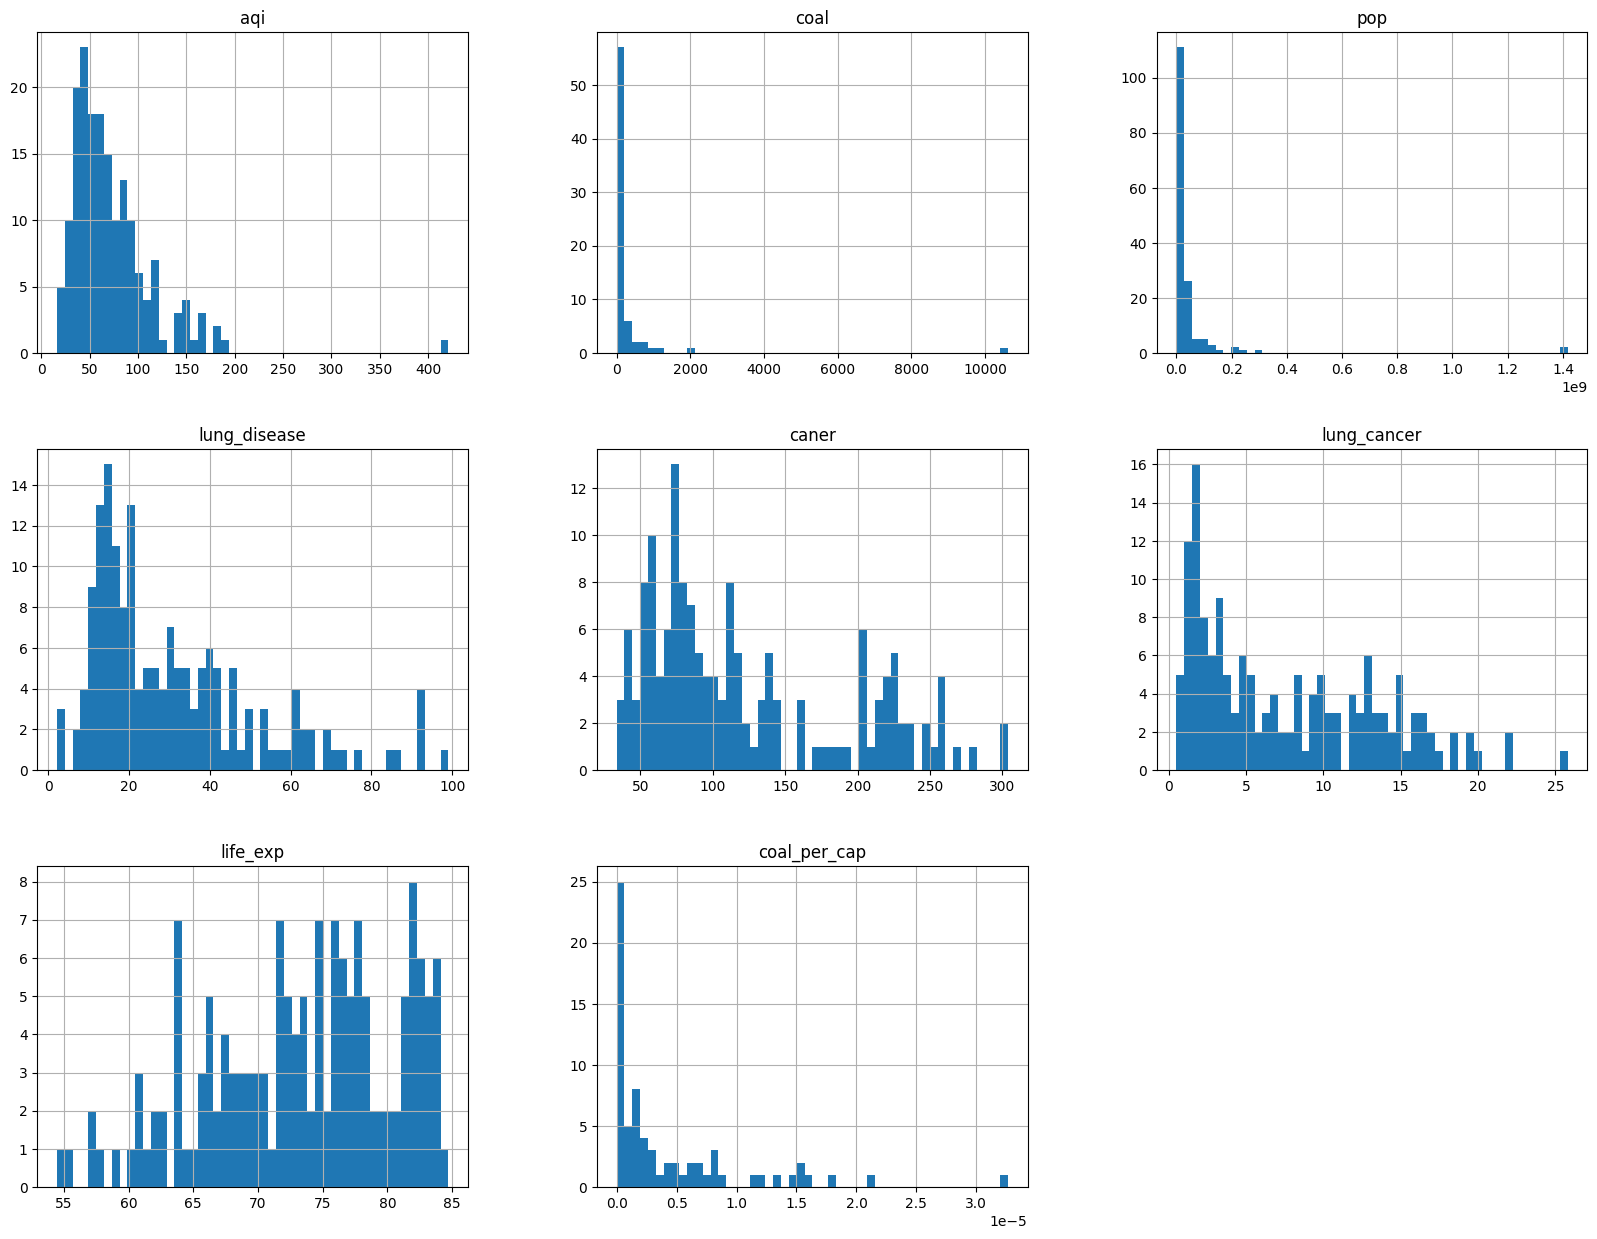

In [53]:
combined.hist(figsize=(20,15), bins=50)

array([[<Axes: xlabel='aqi', ylabel='aqi'>,
        <Axes: xlabel='coal', ylabel='aqi'>,
        <Axes: xlabel='pop', ylabel='aqi'>,
        <Axes: xlabel='lung_disease', ylabel='aqi'>,
        <Axes: xlabel='caner', ylabel='aqi'>,
        <Axes: xlabel='lung_cancer', ylabel='aqi'>,
        <Axes: xlabel='life_exp', ylabel='aqi'>,
        <Axes: xlabel='coal_per_cap', ylabel='aqi'>],
       [<Axes: xlabel='aqi', ylabel='coal'>,
        <Axes: xlabel='coal', ylabel='coal'>,
        <Axes: xlabel='pop', ylabel='coal'>,
        <Axes: xlabel='lung_disease', ylabel='coal'>,
        <Axes: xlabel='caner', ylabel='coal'>,
        <Axes: xlabel='lung_cancer', ylabel='coal'>,
        <Axes: xlabel='life_exp', ylabel='coal'>,
        <Axes: xlabel='coal_per_cap', ylabel='coal'>],
       [<Axes: xlabel='aqi', ylabel='pop'>,
        <Axes: xlabel='coal', ylabel='pop'>,
        <Axes: xlabel='pop', ylabel='pop'>,
        <Axes: xlabel='lung_disease', ylabel='pop'>,
        <Axes: xlabel='caner', y

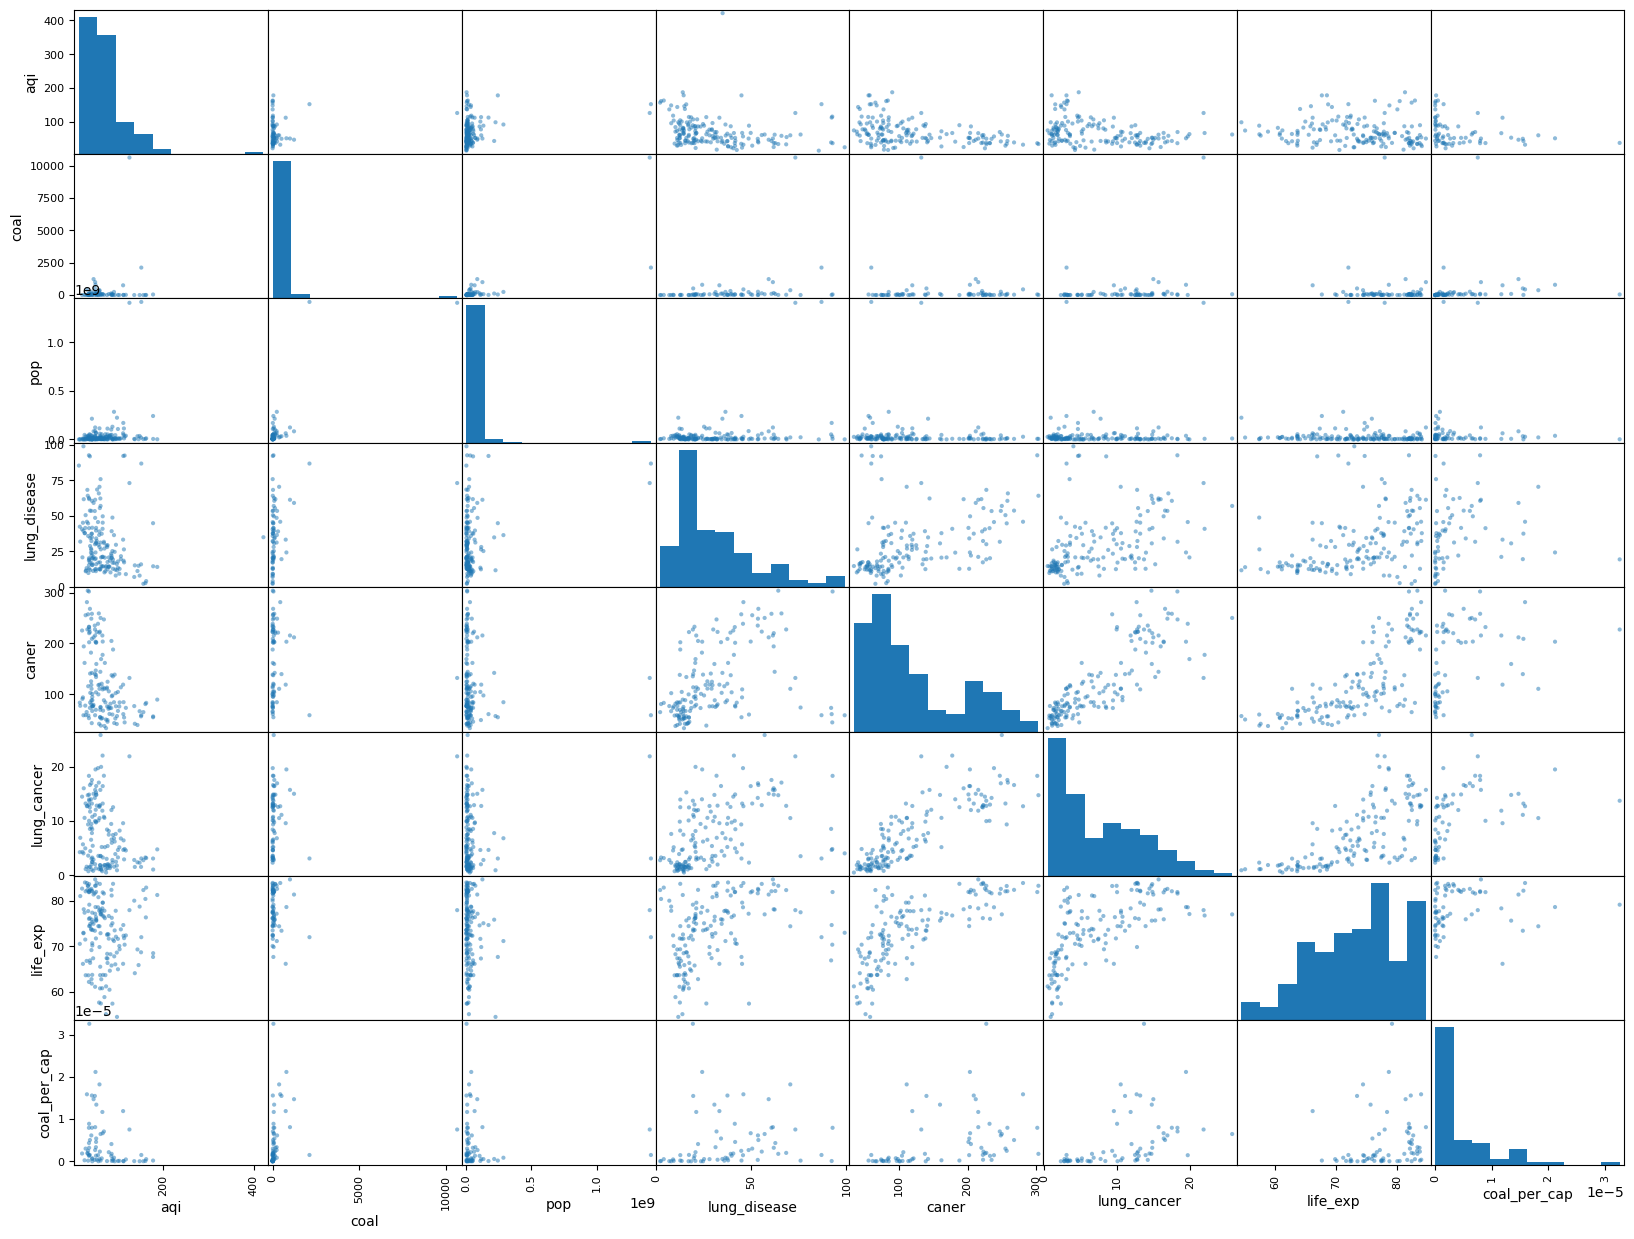

In [55]:
pd.plotting.scatter_matrix(combined, figsize=(20,15))

## Resources and References
*What resources and references have you used for this project?*
📝 <!-- Answer Below -->
- https://www.geeksforgeeks.org/pandas/pandas-join-dataframes/
- https://superuser.com/questions/1161039/how-do-i-join-two-tables-with-libreoffice-calc#1161118
- https://www.libreofficehelp.com/vlookup-libreoffice-calc/
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.plotting.scatter_matrix.html

In [2]:
# ⚠️ Make sure you run this cell at the end of your notebook before every submission!
!jupyter nbconvert --to python source.ipynb

[NbConvertApp] Converting notebook source.ipynb to python
[NbConvertApp] Writing 1271 bytes to source.py
